In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Validation Pseudo-Bulk Preparation

In [33]:
folder_path = '/data1/Projects/functional states/outlier_scrnaseq'

In [34]:
# Load Number of RNA and mitochondrial content metadata
info_list = []
for folder in os.listdir(folder_path):
    for file in os.listdir(os.path.join(folder_path, folder)):
        if file == 'data_info.csv':
            df = pd.read_csv(os.path.join(folder_path, folder, file), index_col=0)
            info_list.append(df)

In [35]:
# Filter data based on mitochondrial content and number of RNA
info = pd.concat(info_list, axis=0)
info.index = info.index.astype(str)
info = info[
    (info['nFeature_RNA'].between(200, 6000)) & 
    (info['percent.mt'] < 15)
].sort_index()
info = info[~info.index.duplicated(keep='first')]
info

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
AAACCCAAGACGAGCT-1,SeuratProject,13905,2701,2.020856
AAACCCAAGAGTTGAT_MF03,SeuratProject,9680,2765,5.702479
AAACCCAAGATGAAGG-1,SeuratProject,4892,2030,5.580540
AAACCCAAGATGGGCT-1,SeuratProject,8504,2358,5.009407
AAACCCAAGCGTTAGG-1,SeuratProject,31185,5371,3.870451
...,...,...,...,...
scc.su014.pre_TTTGTCAAGTGTTGAA,scc.su014.pre,13272,3352,4.219409
scc.su014.pre_TTTGTCACAAATACAG,scc.su014.pre,5470,1730,7.477148
scc.su014.pre_TTTGTCAGTCTAACGT,scc.su014.pre,3428,1531,5.134189
scc.su014.pre_TTTGTCAGTTCAGTAC,scc.su014.pre,8007,2619,4.033970


In [36]:
# Load cell metadata and extract datasets name, sample name, and cancer types of each cell
cells_list = []
for folder in os.listdir(folder_path):
    for file in os.listdir(os.path.join(folder_path, folder)):
        if file == 'Cells.csv':
            df = pd.read_csv(os.path.join(folder_path, folder, file), index_col=0)
            df = df[['sample']]
            df['file'] = folder
            df['file2'] = folder.split('_')[-1]
            cells_list.append(df)

In [37]:
cells = pd.concat(cells_list, axis=0)
cells.index = cells.index.astype(str)
cells = cells[cells.index.isin(info.index)].sort_index()
cells = cells[~cells.index.duplicated(keep='first')]
cells

,sample,file,file2
cell_name,,,
AAACCCAAGACGAGCT-1,Tumor_230,Data_Dong2020_2_Neuroendocrine,Neuroendocrine
AAACCCAAGAGTTGAT_MF03,MF03,Data_Nam2019_1_Hematologic,Hematologic
AAACCCAAGATGAAGG-1,Tumor_162,Data_Dong2020_2_Neuroendocrine,Neuroendocrine
AAACCCAAGATGGGCT-1,Tumor_200,Data_Dong2020_2_Neuroendocrine,Neuroendocrine
AAACCCAAGCGTTAGG-1,Tumor_200,Data_Dong2020_2_Neuroendocrine,Neuroendocrine
...,...,...,...
scc.su014.pre_TTTGTCAAGTGTTGAA,su014_pre,Data_Yost2019_SCC_Skin,Skin
scc.su014.pre_TTTGTCACAAATACAG,su014_pre,Data_Yost2019_SCC_Skin,Skin
scc.su014.pre_TTTGTCAGTCTAACGT,su014_pre,Data_Yost2019_SCC_Skin,Skin


In [38]:
result_dict = dict(zip(cells['sample'], cells['file']))

In [40]:
len(cells['sample'].unique())

100

In [41]:
# Load hallmark score for each single cell
df_list = []
for folder in os.listdir(folder_path):
    for file in os.listdir(os.path.join(folder_path, folder)):
        if file == 'score_hallmark_surv.csv':
            df = pd.read_csv(os.path.join(folder_path, folder, file), index_col=0)
            df_list.append(df)

In [42]:
scores = pd.concat(df_list, axis=0)
scores.index = scores.index.astype(str)
scores = scores[scores.index.isin(info.index)].sort_index()
scores = scores[~scores.index.duplicated(keep='first')]
scores

,IA_UCell,TPI_UCell,GIM_UCell,SPS_UCell,AID_UCell,ERI_UCell,RCD_UCell,EGS_UCell,DCE_UCell,AIM_UCell
AAACCCAAGACGAGCT-1,0.036747,0.024714,0.048411,0.097481,0.033254,0.026000,0.071897,0.074763,0.157237,0.078695
AAACCCAAGAGTTGAT_MF03,0.033874,0.037607,0.045074,0.127871,0.070868,0.062056,0.098926,0.102633,0.148526,0.109187
AAACCCAAGATGAAGG-1,0.013299,0.000000,0.092646,0.095657,0.021412,0.022042,0.070609,0.068904,0.148437,0.081865
AAACCCAAGATGGGCT-1,0.059586,0.000000,0.056319,0.104395,0.031509,0.000000,0.083978,0.086388,0.118289,0.090221
AAACCCAAGCGTTAGG-1,0.052000,0.009274,0.076593,0.111572,0.049807,0.031167,0.109312,0.097518,0.161807,0.096104
...,...,...,...,...,...,...,...,...,...,...
scc.su014.pre_TTTGTCAAGTGTTGAA,0.066034,0.024905,0.038365,0.141639,0.098877,0.045083,0.128086,0.120526,0.222259,0.160046
scc.su014.pre_TTTGTCACAAATACAG,0.043713,0.091869,0.042316,0.136800,0.097474,0.049208,0.104775,0.122932,0.141274,0.141890
scc.su014.pre_TTTGTCAGTCTAACGT,0.038782,0.020905,0.048877,0.118868,0.043579,0.021556,0.098046,0.093880,0.066519,0.124576
scc.su014.pre_TTTGTCAGTTCAGTAC,0.033138,0.025845,0.048530,0.126034,0.078825,0.000000,0.095005,0.093305,0.110763,0.125665


In [43]:
scores1 = pd.concat([scores, cells, info], axis=1).dropna()
scores1

,IA_UCell,TPI_UCell,GIM_UCell,SPS_UCell,AID_UCell,ERI_UCell,RCD_UCell,EGS_UCell,DCE_UCell,AIM_UCell,sample,file,file2,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
AAACCCAAGACGAGCT-1,0.036747,0.024714,0.048411,0.097481,0.033254,0.026000,0.071897,0.074763,0.157237,0.078695,Tumor_230,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,13905,2701,2.020856
AAACCCAAGAGTTGAT_MF03,0.033874,0.037607,0.045074,0.127871,0.070868,0.062056,0.098926,0.102633,0.148526,0.109187,MF03,Data_Nam2019_1_Hematologic,Hematologic,SeuratProject,9680,2765,5.702479
AAACCCAAGATGAAGG-1,0.013299,0.000000,0.092646,0.095657,0.021412,0.022042,0.070609,0.068904,0.148437,0.081865,Tumor_162,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,4892,2030,5.580540
AAACCCAAGATGGGCT-1,0.059586,0.000000,0.056319,0.104395,0.031509,0.000000,0.083978,0.086388,0.118289,0.090221,Tumor_200,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,8504,2358,5.009407
AAACCCAAGCGTTAGG-1,0.052000,0.009274,0.076593,0.111572,0.049807,0.031167,0.109312,0.097518,0.161807,0.096104,Tumor_200,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,31185,5371,3.870451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scc.su014.pre_TTTGTCAAGTGTTGAA,0.066034,0.024905,0.038365,0.141639,0.098877,0.045083,0.128086,0.120526,0.222259,0.160046,su014_pre,Data_Yost2019_SCC_Skin,Skin,scc.su014.pre,13272,3352,4.219409
scc.su014.pre_TTTGTCACAAATACAG,0.043713,0.091869,0.042316,0.136800,0.097474,0.049208,0.104775,0.122932,0.141274,0.141890,su014_pre,Data_Yost2019_SCC_Skin,Skin,scc.su014.pre,5470,1730,7.477148
scc.su014.pre_TTTGTCAGTCTAACGT,0.038782,0.020905,0.048877,0.118868,0.043579,0.021556,0.098046,0.093880,0.066519,0.124576,su014_pre,Data_Yost2019_SCC_Skin,Skin,scc.su014.pre,3428,1531,5.134189
scc.su014.pre_TTTGTCAGTTCAGTAC,0.033138,0.025845,0.048530,0.126034,0.078825,0.000000,0.095005,0.093305,0.110763,0.125665,su014_pre,Data_Yost2019_SCC_Skin,Skin,scc.su014.pre,8007,2619,4.033970


In [44]:
# Load pre-calculated thresold data
percentiles = pd.read_csv("/data1/Projects/functional states/thresold_sep_hallmark.csv", header=[0, 1], index_col=0)
percentiles

Category        IA_UCell           TPI_UCell           GIM_UCell            \
Threshold            Low      High       Low      High       Low      High   
file2                                                                        
Brain           0.022709  0.110660  0.018762  0.141722  0.000094  0.074696   
Breast          0.015628  0.082216  0.016692  0.137808  0.000096  0.074260   
Colorectal      0.016599  0.098375  0.015217  0.133093  0.000102  0.078729   
Head and Neck   0.016863  0.088241  0.023748  0.121968  0.000108  0.083245   
Hematologic     0.015265  0.072660  0.018290  0.108492  0.000114  0.093839   
Kidney          0.015689  0.084207  0.019685  0.142363  0.000098  0.078528   
Liver-Biliary   0.013080  0.067364  0.018996  0.116496  0.000099  0.071332   
Lung            0.016926  0.097300  0.022290  0.141209  0.000104  0.092478   
Neuroendocrine  0.014479  0.074076  0.000037  0.082654  0.000105  0.080500   
Ovarian         0.021622  0.114675  0.017703  0.116667  0.000102  0.074894   
Pancreas        0.024807  0.116819  0.017152  0.151353  0.000092  0.069449   
Prostate        0.017675  0.082546  0.009562  0.108367  0.000093  0.074965   
Sarcoma         0.024313  0.085986  0.012133  0.116997  0.000106  0.079959   
Skin            0.018336  0.091862  0.019778  0.120328  0.000105  0.086643   

Category       SPS_UCell           AID_UCell           ERI_UCell            \
Threshold            Low      High       Low      High       Low      High   
file2                                                                        
Brain           0.100018  0.141624  0.039451  0.133715  0.015660  0.087080   
Breast          0.095495  0.135040  0.020402  0.124538  0.010463  0.057716   
Colorectal      0.094982  0.138223  0.019575  0.124754  0.011833  0.058569   
Head and Neck   0.107401  0.136841  0.049144  0.135050  0.013510  0.064886   
Hematologic     0.101122  0.131894  0.034547  0.123638  0.013696  0.068521   
Kidney          0.096642  0.139932  0.024035  0.135504  0.012115  0.063330   
Liver-Biliary   0.000213  0.130581  0.021467  0.119691  0.000036  0.054326   
Lung            0.101276  0.142696  0.038749  0.131988  0.013420  0.065079   
Neuroendocrine  0.087628  0.121557  0.015126  0.100249  0.018952  0.086030   
Ovarian         0.104030  0.138996  0.037287  0.115954  0.013064  0.067684   
Pancreas        0.000230  0.148255  0.028810  0.164032  0.011136  0.067671   
Prostate        0.090418  0.127548  0.017782  0.096004  0.008260  0.053744   
Sarcoma         0.102541  0.129823  0.030264  0.108169  0.009611  0.051632   
Skin            0.099821  0.137551  0.036815  0.128345  0.017467  0.085159   

Category       RCD_UCell           EGS_UCell           DCE_UCell            \
Threshold            Low      High       Low      High       Low      High   
file2                                                                        
Brain           0.081885  0.129207  0.077477  0.117021  0.067206  0.169414   
Breast          0.000177  0.116895  0.064973  0.110270  0.065082  0.151320   
Colorectal      0.071858  0.127379  0.065347  0.109977  0.068914  0.157740   
Head and Neck   0.082903  0.122504  0.078629  0.110578  0.080008  0.154347   
Hematologic     0.076954  0.116623  0.072546  0.107248  0.068356  0.145387   
Kidney          0.069722  0.125424  0.064689  0.113967  0.080849  0.176589   
Liver-Biliary   0.000173  0.114688  0.000160  0.103348  0.044366  0.128298   
Lung            0.077808  0.133483  0.072503  0.115151  0.075099  0.158254   
Neuroendocrine  0.000150  0.106773  0.000149  0.096786  0.016698  0.094531   
Ovarian         0.083167  0.129735  0.077405  0.114002  0.092192  0.165952   
Pancreas        0.000190  0.141885  0.000183  0.117026  0.061602  0.156805   
Prostate        0.068954  0.117170  0.000160  0.103347  0.057705  0.127726   
Sarcoma         0.076278  0.112442  0.074572  0.104178  0.103831  0.176606   
Skin            0.082682  0.123307  0.077720  0.114233  0.051650  0.152575   

Category       AIM_

In [45]:
# Applying thresold to assign hallmark category to each cell

scores1[scores.columns] = scores1[scores.columns].astype('float32')

# Step 2: Precompute boolean masks
# Above high thresold mask
above_95_df = (scores1[scores.columns].values > 
               percentiles.loc[scores1['file2'], (slice(None), 'High')].values)
# Below low thresold mask
below_5_df = (scores1[scores.columns].values < 
              percentiles.loc[scores1['file2'], (slice(None), 'Low')].values)

# Step 3: Convert boolean masks to class strings
# Join column names where conditions are met
High = np.where(above_95_df, np.array(scores.columns), '')
Low = np.where(below_5_df, np.array(scores.columns), '')

# Step 4: Concatenate results along rows for each condition
scores1['High'] = [';'.join(filter(None, row)) if any(row) else None for row in High]
scores1['Low'] = [';'.join(filter(None, row)) if any(row) else None for row in Low]

# Remove duplicate indexes if needed
scores1 = scores1[~scores1.index.duplicated(keep='first')]
scores1

,IA_UCell,TPI_UCell,GIM_UCell,SPS_UCell,AID_UCell,ERI_UCell,RCD_UCell,EGS_UCell,DCE_UCell,AIM_UCell,sample,file,file2,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,High,Low
AAACCCAAGACGAGCT-1,0.036747,0.024714,0.048411,0.097481,0.033254,0.026000,0.071897,0.074763,0.157237,0.078695,Tumor_230,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,13905,2701,2.020856,DCE_UCell,None
AAACCCAAGAGTTGAT_MF03,0.033874,0.037607,0.045074,0.127871,0.070868,0.062056,0.098926,0.102633,0.148526,0.109187,MF03,Data_Nam2019_1_Hematologic,Hematologic,SeuratProject,9680,2765,5.702479,DCE_UCell,None
AAACCCAAGATGAAGG-1,0.013299,0.000000,0.092646,0.095657,0.021412,0.022042,0.070609,0.068904,0.148437,0.081865,Tumor_162,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,4892,2030,5.580540,GIM_UCell;DCE_UCell,IA_UCell;TPI_UCell
AAACCCAAGATGGGCT-1,0.059586,0.000000,0.056319,0.104395,0.031509,0.000000,0.083978,0.086388,0.118289,0.090221,Tumor_200,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,8504,2358,5.009407,DCE_UCell,TPI_UCell;ERI_UCell
AAACCCAAGCGTTAGG-1,0.052000,0.009274,0.076593,0.111572,0.049807,0.031167,0.109312,0.097518,0.161807,0.096104,Tumor_200,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,31185,5371,3.870451,RCD_UCell;EGS_UCell;DCE_UCell,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scc.su014.pre_TTTGTCAAGTGTTGAA,0.066034,0.024905,0.038365,0.141639,0.098877,0.045083,0.128086,0.120526,0.222259,0.160046,su014_pre,Data_Yost2019_SCC_Skin,Skin,scc.su014.pre,13272,3352,4.219409,SPS_UCell;RCD_UCell;EGS_UCell;DCE_UCell;AIM_UCell,None
scc.su014.pre_TTTGTCACAAATACAG,0.043713,0.091869,0.042316,0.136800,0.097474,0.049208,0.104775,0.122932,0.141274,0.141890,su014_pre,Data_Yost2019_SCC_Skin,Skin,scc.su014.pre,5470,1730,7.477148,EGS_UCell;AIM_UCell,None
scc.su014.pre_TTTGTCAGTCTAACGT,0.038782,0.020905,0.048877,0.118868,0.043579,0.021556,0.098046,0.093880,0.066519,0.124576,su014_pre,Data_Yost2019_SCC_Skin,Skin,scc.su014.pre,3428,1531,5.134189,None,None
scc.su014.pre_TTTGTCAGTTCAGTAC,0.033138,0.025845,0.048530,0.126034,0.078825,0.000000,0.095005,0.093305,0.110763,0.125665,su014_pre,Data_Yost2019_SCC_Skin,Skin,scc.su014.pre,8007,2619,4.033970,None,ERI_UCell


In [ ]:
# we are preparing pseudobulk for high and low separately. So, change to Low or High accordingly.

In [55]:
scores_1 = scores1.dropna(subset=['High'])
scores_1['original_index'] = scores_1.index
scores_1.loc[:, 'High'] = scores_1['High'].str.split(';')
scores_1 = scores_1.explode('High').reset_index()
scores_1['new_index'] = scores_1.groupby('original_index').cumcount()
scores_1['index_with_suffix'] = scores_1['original_index'].astype(str) + '__' + scores_1['new_index'].astype(str)
scores_1 = scores_1.set_index('index_with_suffix')
scores_1 = scores_1.drop(columns=['new_index', 'original_index'])
scores_1

/tmp/ipykernel_35124/3056637674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_1['original_index'] = scores_1.index


,index,IA_UCell,TPI_UCell,GIM_UCell,SPS_UCell,AID_UCell,ERI_UCell,RCD_UCell,EGS_UCell,DCE_UCell,AIM_UCell,sample,file,file2,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,High,Low
index_with_suffix,,,,,,,,,,,,,,,,,,,,
AAACCCAAGACGAGCT-1__0,AAACCCAAGACGAGCT-1,0.036747,0.024714,0.048411,0.097481,0.033254,0.026000,0.071897,0.074763,0.157237,0.078695,Tumor_230,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,13905,2701,2.020856,DCE_UCell,None
AAACCCAAGAGTTGAT_MF03__0,AAACCCAAGAGTTGAT_MF03,0.033874,0.037607,0.045074,0.127871,0.070868,0.062056,0.098926,0.102633,0.148526,0.109187,MF03,Data_Nam2019_1_Hematologic,Hematologic,SeuratProject,9680,2765,5.702479,DCE_UCell,None
AAACCCAAGATGAAGG-1__0,AAACCCAAGATGAAGG-1,0.013299,0.000000,0.092646,0.095657,0.021412,0.022042,0.070609,0.068904,0.148437,0.081865,Tumor_162,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,4892,2030,5.580540,GIM_UCell,IA_UCell;TPI_UCell
AAACCCAAGATGAAGG-1__1,AAACCCAAGATGAAGG-1,0.013299,0.000000,0.092646,0.095657,0.021412,0.022042,0.070609,0.068904,0.148437,0.081865,Tumor_162,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,4892,2030,5.580540,DCE_UCell,IA_UCell;TPI_UCell
AAACCCAAGATGGGCT-1__0,AAACCCAAGATGGGCT-1,0.059586,0.000000,0.056319,0.104395,0.031509,0.000000,0.083978,0.086388,0.118289,0.090221,Tumor_200,Data_Dong2020_2_Neuroendocrine,Neuroendocrine,SeuratProject,8504,2358,5.009407,DCE_UCell,TPI_UCell;ERI_UCell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scc.su014.pre_TTTGTCACAAATACAG__1,scc.su014.pre_TTTGTCACAAATACAG,0.043713,0.091869,0.042316,0.136800,0.097474,0.049208,0.104775,0.122932,0.141274,0.141890,su014_pre,Data_Yost2019_SCC_Skin,Skin,scc.su014.pre,5470,1730,7.477148,AIM_UCell,None
scc.su014.pre_TTTGTCATCCTTGCCA__0,scc.su014.pre_TTTGTCATCCTTGCCA,0.054966,0.049714,0.087053,0.136950,0.060289,0.008833,0.111458,0.114901,0.195200,0.146263,su014_pre,Data_Yost2019_SCC_Skin,Skin,scc.su014.pre,15639,3849,2.596074,GIM_UCell,ERI_UCell
scc.su014.pre_TTTGTCATCCTTGCCA__1,scc.su014.pre_TTTGTCATCCTTGCCA,0.054966,0.049714,0.087053,0.136950,0.060289,0.008833,0.111458,0.114901,0.195200,0.146263,su014_pre,Data_Yost2019_SCC_Skin,Skin,scc.su014.pre,15639,3849,2.596074,EGS_UCell,ERI_UCell


In [56]:
group1 = scores_1.groupby('file')

i1_list = []
name1_list = []
for name1, i1 in group1:
    group2 = i1.groupby('sample')
    i2_list = []
    name2_list = []
    for name2, i2 in group2:
        name2_list.append(name2)
        req = i2['High'].value_counts()
        req = req[req >= 100]
        mask = i2['High'].isin(req.index)
        i2_list.append(i2[mask].index.tolist())
    i1_list.append(i2_list)
    name1_list.append(name2_list)

In [57]:
flat_i1_list = [index for sublist in i1_list for subsublist in sublist for index in subsublist]
subset_scores1 = scores_1.loc[flat_i1_list]
subset_scores1 = subset_scores1.set_index('index')
# subset_scores1 = subset_scores1[~subset_scores1.index.duplicated(keep='first')] 
subset_scores1 = subset_scores1[['file', 'file2', 'sample', 'High']]
# subset_scores1.to_csv('scores_hallmark1.csv')
subset_scores1

,file,file2,sample,High
index,,,,
AAACCTGTCTTTAGTC.1,Data_Dong2020_1_Neuroendocrine,Neuroendocrine,Tumor_10,GIM_UCell
AAAGATGCAGAGTGTG.1,Data_Dong2020_1_Neuroendocrine,Neuroendocrine,Tumor_10,GIM_UCell
AAAGATGCAGAGTGTG.1,Data_Dong2020_1_Neuroendocrine,Neuroendocrine,Tumor_10,SPS_UCell
AAAGATGCAGAGTGTG.1,Data_Dong2020_1_Neuroendocrine,Neuroendocrine,Tumor_10,RCD_UCell
AAAGATGCAGAGTGTG.1,Data_Dong2020_1_Neuroendocrine,Neuroendocrine,Tumor_10,EGS_UCell
...,...,...,...,...
scc.su014.pre_TTTGTCACAAATACAG,Data_Yost2019_SCC_Skin,Skin,su014_pre,AIM_UCell
scc.su014.pre_TTTGTCATCCTTGCCA,Data_Yost2019_SCC_Skin,Skin,su014_pre,GIM_UCell
scc.su014.pre_TTTGTCATCCTTGCCA,Data_Yost2019_SCC_Skin,Skin,su014_pre,EGS_UCell


In [49]:
import scanpy

In [50]:
def sum_columns(grouped_data):
    return grouped_data.sum(axis=1)

In [58]:
group1 = subset_scores1.groupby('file')

for name1, i1 in group1:
    cells = pd.read_csv(f"/data1/Projects/functional states/outlier_scrnaseq/{i1['file'].iloc[0]}/Cells.csv", low_memory=False)
    genes = pd.read_csv(f"/data1/Projects/functional states/outlier_scrnaseq/{i1['file'].iloc[0]}/Genes.txt", header=None, names=["gene_id"])
    mtx_files = [f for f in os.listdir(f"/data1/Projects/functional states/outlier_scrnaseq/{i1['file'].iloc[0]}") if f.endswith('.mtx')]
    if not mtx_files:
        raise FileNotFoundError(f"No .mtx file found in the folder {i1['file'].iloc[0]}")
    exp_data = scanpy.read(f"/data1/Projects/functional states/outlier_scrnaseq/{i1['file'].iloc[0]}/{mtx_files[0]}")
    exp_data.var_names = cells["cell_name"].astype(str)
    exp_data.obs.index = genes["gene_id"].astype(str)
    exp_data = pd.DataFrame(exp_data.X.toarray(), index=exp_data.obs.index, columns=exp_data.var_names).astype(int)
    exp_data.columns = exp_data.columns.astype(str)
    exp_data.index = exp_data.index.astype(str)
    exp_data = exp_data.loc[:, ~exp_data.columns.duplicated(keep='first')]
    exp_data = exp_data[~exp_data.index.duplicated(keep='first')]
    print(i1['file'].unique())
    group2 = i1.groupby('sample')
    for name2, i2 in group2:
        group3 = i2.groupby('High')
        counter = 1
        for name3, i3 in group3:
            exp_data_req = exp_data.loc[:, i3.index]
            exp_data_req = sum_columns(exp_data_req)
            #exp_data_req.columns = [[f"{i3['sample'].iloc[0]}${i3['High'].iloc[0]}"]]
            output_filename = f"val_pos/{i3['sample'].iloc[0]}_{i3['file2'].iloc[0]}_{i3['High'].iloc[0]}_{counter}.csv"
            exp_data_req.to_csv(output_filename)
            counter += 1

['Data_Dong2020_1_Neuroendocrine']
['Data_Dong2020_2_Neuroendocrine']
['Data_Gao2021_Breast']
['Data_Nam2019_1_Hematologic']
['Data_Nam2019_2_Hematologic']
['Data_Pal2021_1_Breast']
['Data_Pal2021_2_Breast']
['Data_Pal2021_3_Breast']
['Data_Pal2021_4_Breast']
['Data_Pal2021_5_Breast']
['Data_Yost2019_BCC_Skin']
['Data_Yost2019_SCC_Skin']


# Final Validation Data

In [98]:
with open("hallmark_feature.txt", "r") as file:
    feature_name = [line.strip() for line in file]

In [129]:
# change the val_pos to val_neg for positive and negative data preparation respectively

In [105]:
folder_path = '/data1/Projects/Hallmark/val_pos/'
df_list = []
df_list2 = []
counter = 0
for file in os.listdir(folder_path):
    df = pd.read_csv(os.path.join(folder_path, file), index_col=(0))
    df.columns = df.columns.str.replace('$', '&')
    df.index = df.index.str.split('_').str[0]
    df = df[~df.index.duplicated(keep='first')]
    df = df[df.index.isin(feature_name)]
    df.columns = ['Positive_{}'.format(counter)]
    counter += 1
    df_list.append(df)
    df = df.T
    df['Cancer'] = file.split('_')[-4]
    df['Hallmark'] = file.split('_')[-3]
    df['Sample'] = ['_'.join(file.split('_')[:-4])]
    df = df[['Cancer', 'Hallmark', 'Sample']]
    df_list2.append(df)

In [106]:
c_result = pd.concat(df_list2, axis=0).sort_index()
c_result = c_result[~c_result.index.duplicated(keep='first')]
c_result

gene_id,Cancer,Hallmark,Sample
Positive_0,Neuroendocrine,SPS,Tumor_10
Positive_1,Skin,ERI,su011_post
Positive_10,Breast,EGS,Triple_negative_0106
Positive_100,Breast,AID,ER_positive_0360
Positive_101,Neuroendocrine,DCE,Tumor_230
...,...,...,...
Positive_95,Skin,DCE,su006_pre
Positive_96,Hematologic,ERI,MF01
Positive_97,Neuroendocrine,SPS,Tumor_40
Positive_98,Breast,IA,TNBC1


In [107]:
c_result['Hallmark'].value_counts()

Hallmark
ERI    79
DCE    73
RCD    73
IA     69
EGS    69
SPS    66
GIM    61
AIM    60
AID    43
TPI    34
Name: count, dtype: int64

In [108]:
c_result.to_csv('meta_val_pos_sep_hallmark.csv')

In [109]:
result = pd.concat(df_list, axis=1, join='outer').fillna(0).astype(int).T.sort_index()
result = result.loc[:, ~result.columns.duplicated(keep='first')]
result = result[~result.index.duplicated(keep='first')]
result

gene_id,A1BG,A2M,AAAS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,...,Z93241.1,AL118516.1,MIR99AHG,DSCAM,FAM3B,TFF2,GATD3A,IGJ,HULC,BAI3
Positive_0,181,60,127,46,71,414,111,290,78,98,...,0,0,0,0,0,0,0,0,0,0
Positive_1,124,1,57,0,106,221,59,427,163,0,...,0,0,0,0,0,0,0,0,0,0
Positive_10,64,196,16,108,14,129,48,64,13,26,...,13,47,13,0,3,0,21,0,0,0
Positive_100,15,160,4,14,8,54,11,16,3,4,...,20,13,0,0,0,0,1,0,0,0
Positive_101,8685,1869,7039,560,1443,5843,2194,8125,2368,2225,...,130,10553,8120,55,13,0,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Positive_95,426,192,311,0,415,900,188,967,261,0,...,0,0,285,0,6,0,0,0,0,0
Positive_96,27,0,18,19,11,14,23,53,14,4,...,0,0,0,0,0,0,0,0,0,0
Positive_97,540,300,699,218,236,1246,334,1139,309,646,...,0,0,0,0,0,0,0,0,0,0
Positive_98,143,885,37,158,43,139,116,132,34,78,...,0,0,11,0,10,0,0,0,0,0


In [110]:
result.to_csv('data_val_pos_sep_hallmark.csv')

# Model INference

In [111]:
meta_neg = pd.read_csv('meta_val_neg_sep_hallmark.csv', index_col=(0))
meta_neg

,Cancer,Hallmark,Sample
Negative_0,Breast,ERI,ER_positive_0360
Negative_1,Breast,IA,HER2_0308
Negative_10,Skin,EGS,su010_pre
Negative_100,Skin,AID,su001_post
Negative_101,Breast,GIM,ER_positive_0056
...,...,...,...
Negative_95,Breast,GIM,HER2_0331
Negative_96,Breast,ERI,TNBC2
Negative_97,Skin,RCD,su001_post
Negative_98,Skin,ERI,su008_pre


In [112]:
len(meta_neg['Sample'].unique())

93

In [113]:
meta_pos = pd.read_csv('meta_val_pos_sep_hallmark.csv', index_col=(0))
meta_pos

,Cancer,Hallmark,Sample
Positive_0,Neuroendocrine,SPS,Tumor_10
Positive_1,Skin,ERI,su011_post
Positive_10,Breast,EGS,Triple_negative_0106
Positive_100,Breast,AID,ER_positive_0360
Positive_101,Neuroendocrine,DCE,Tumor_230
...,...,...,...
Positive_95,Skin,DCE,su006_pre
Positive_96,Hematologic,ERI,MF01
Positive_97,Neuroendocrine,SPS,Tumor_40
Positive_98,Breast,IA,TNBC1


In [114]:
len(meta_pos['Sample'].unique())

91

In [115]:
data_pos = pd.read_csv('data_val_pos_sep_hallmark.csv',index_col=(0))
data_pos

,A1BG,A2M,AAAS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,...,Z93241.1,AL118516.1,MIR99AHG,DSCAM,FAM3B,TFF2,GATD3A,IGJ,HULC,BAI3
Positive_0,181,60,127,46,71,414,111,290,78,98,...,0,0,0,0,0,0,0,0,0,0
Positive_1,124,1,57,0,106,221,59,427,163,0,...,0,0,0,0,0,0,0,0,0,0
Positive_10,64,196,16,108,14,129,48,64,13,26,...,13,47,13,0,3,0,21,0,0,0
Positive_100,15,160,4,14,8,54,11,16,3,4,...,20,13,0,0,0,0,1,0,0,0
Positive_101,8685,1869,7039,560,1443,5843,2194,8125,2368,2225,...,130,10553,8120,55,13,0,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Positive_95,426,192,311,0,415,900,188,967,261,0,...,0,0,285,0,6,0,0,0,0,0
Positive_96,27,0,18,19,11,14,23,53,14,4,...,0,0,0,0,0,0,0,0,0,0
Positive_97,540,300,699,218,236,1246,334,1139,309,646,...,0,0,0,0,0,0,0,0,0,0
Positive_98,143,885,37,158,43,139,116,132,34,78,...,0,0,11,0,10,0,0,0,0,0


In [116]:
data_neg = pd.read_csv('data_val_neg_sep_hallmark.csv',index_col=(0))
data_neg

,NOC2L,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,B3GALT6,C1QTNF12,UBE2J2,...,LYRM5,ATP5G2,ATP5B,TCEB2,ATP5E,GLTSCR2,SEPW1,ATP5J,IGJ,BAI3
Negative_0,482,298,383,193,110,98,489,205,1,323,...,0,0,0,0,0,0,0,0,0,0
Negative_1,274,409,406,200,99,45,383,30,3,232,...,0,0,0,0,0,0,0,0,0,0
Negative_10,38,1,37,0,49,39,62,0,0,36,...,0,0,0,0,0,0,0,0,0,0
Negative_100,992,74,2139,36,2859,2244,1875,38,6,634,...,0,0,0,0,0,0,0,0,0,0
Negative_101,51,5,53,33,0,1,28,12,1,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Negative_95,26,47,419,23,41,38,90,6,3,28,...,0,0,0,0,0,0,0,0,0,0
Negative_96,155,181,5993,58,11,34,193,91,0,144,...,338,1470,1121,3188,3743,1009,1171,2023,0,0
Negative_97,232,39,514,8,694,704,431,8,2,148,...,0,0,0,0,0,0,0,0,0,0
Negative_98,137,282,754,59,377,445,316,16,6,137,...,0,0,0,0,0,0,0,0,0,0


In [117]:
import tensorflow as tf
import joblib
from scipy.stats import rankdata, zscore

In [84]:
model = tf.keras.models.load_model('hallmark_model.keras')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 9326)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    596,928 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         17 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         17 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │         17 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         17 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │         17 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1)         │         17 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         17 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 1)         │         17 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1)         │         17 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 1)         │         17 │ dense_19[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,822,496 (6.95 MB)

 Trainable params: 607,498 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,214,998 (4.63 MB)

In [85]:
scaler = joblib.load('hallmark_scaler.joblib')
scaler

StandardScaler()

In [86]:
with open('hallmark_feature.txt', 'r') as file:
    feature_name = file.read().splitlines()
    len(feature_name)

In [118]:
hall_all = pd.concat([data_pos, data_neg], axis=0)
hall_all = hall_all.loc[:, ~hall_all.columns.duplicated(keep='first')]
hall_all = hall_all.reindex(columns = feature_name, fill_value = 0).fillna(0)
hall_all_index = hall_all.index
hall_all_columns = hall_all.columns
hall_all = rankdata(hall_all * -1, axis=1, method='average')
hall_all = np.log2(hall_all)
hall_all = pd.DataFrame(hall_all)
#hall_all.columns = hall_all_columns
hall_all.index = hall_all_index
hall_all = scaler.transform(hall_all)
hall_all

array([[-1.42950873, -0.10591741,  0.68109652, ...,  0.09469304,
        -1.08182013,  0.44244176],
       [ 0.1169275 , -1.43388019, -0.25365054, ...,  1.18848676,
         0.39367694,  0.47715099],
       [ 0.4767102 , -0.10171774,  0.11219206, ...,  0.52413767,
         0.63339896,  0.46206316],
       ...,
       [-0.43332576, -2.52929029,  0.33713267, ...,  0.81995604,
         0.66963285,  0.32239719],
       [ 0.46880135, -1.2725457 ,  0.72416129, ...,  0.98300742,
         0.07650655, -2.10767847],
       [ 0.98338238,  1.38893002,  0.86002554, ...,  0.36591606,
        -1.74810577,  0.39829706]])

In [119]:
labels = [1] * len(data_pos) + [0] * len(data_neg)
len(labels)

1227

In [120]:
hall_list = ['AIM', 'DCE', 'EGS', 'GIM', 'RCD', 'SPS', 'AID', 'IA', 'ERI', 'TPI']

In [121]:
cancer_hallmarks = {
    'ERI': 'Evading Replicative Immortality',
    'AIM': 'Activating Invasion and Metastasis',
    'GIM': 'Genome Instability and Mutation',
    'SPS': 'Sustaining Proliferative Signaling',
    'TPI': 'Tumor-Promoting Inflammation',
    'AID': 'Avoiding Immune Destruction',
    'DCE': 'Deregulating Cellular Energetics',
    'RCD': 'Resisting Cell Death',
    'IA': 'Inducing Angiogenesis',
    'EGS': 'Enabling Growth Suppressor'
}

In [122]:
prediction = model.predict(hall_all)
prediction_df = pd.DataFrame()

for task_id in range(10):
    pred = np.array(np.round(prediction[task_id])).flatten()
    prediction_df[f'task_{task_id}'] = pred

prediction_df.columns = hall_list
prediction_df.index = hall_all_index
prediction_df['orig'] = labels
prediction_df

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI,orig
Positive_0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
Positive_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
Positive_10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
Positive_100,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
Positive_101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
Negative_95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Negative_96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
Negative_97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Negative_98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [123]:
all_meta = pd.concat([meta_pos, meta_neg], axis=0)
all_meta = pd.concat([all_meta, prediction_df], axis=1)
all_meta['pred'] = all_meta.apply(lambda row: row[row['Hallmark']] if np.round(row[row['Hallmark']]) == row['orig'] else 0, axis=1)
all_meta['paper'] = all_meta['Sample'].map(result_dict)
all_meta['paper'] = all_meta['paper'].str.split('_').str[1]
all_meta['pred1'] = np.round(all_meta['pred'])
all_meta

,Cancer,Hallmark,Sample,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI,orig,pred,paper,pred1
Positive_0,Neuroendocrine,SPS,Tumor_10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,Dong2020,1.0
Positive_1,Skin,ERI,su011_post,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,Yost2019,1.0
Positive_10,Breast,EGS,Triple_negative_0106,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,Pal2021,1.0
Positive_100,Breast,AID,ER_positive_0360,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,Pal2021,1.0
Positive_101,Neuroendocrine,DCE,Tumor_230,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Dong2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Negative_95,Breast,GIM,HER2_0331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Pal2021,0.0
Negative_96,Breast,ERI,TNBC2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,Gao2021,0.0
Negative_97,Skin,RCD,su001_post,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Yost2019,0.0
Negative_98,Skin,ERI,su008_pre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Yost2019,0.0


In [124]:
colors = {
    'ERI': 'blue',
    'AIM': 'green',
    'GIM': 'red',
    'SPS': 'purple',
    'TPI': 'orange',
    'AID': 'cyan',
    'DCE': 'magenta',
    'RCD': 'gold',
    'IA': 'brown',
    'EGS': 'pink'
}

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc

In [125]:
fold_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'balanced_accuracy': [], 'data':[],
               'Patient': [], 'Positive': [], 'Negative': []}
for i in all_meta['paper'].unique():
    pos = all_meta[all_meta['paper'] == i]
    fold_results['accuracy'].append(accuracy_score(pos['orig'], pos['pred1']))
    fold_results['precision'].append(precision_score(pos['orig'], pos['pred1'], zero_division=0))
    fold_results['recall'].append(recall_score(pos['orig'], pos['pred1'], zero_division=0))
    fold_results['f1'].append(f1_score(pos['orig'], pos['pred1'], zero_division=0))
    fold_results['balanced_accuracy'].append(balanced_accuracy_score(pos['orig'], pos['pred1']))
    fold_results['data'].append(i)
    fold_results['Patient'].append(len(pos['Sample'].unique()))
    fold_results['Positive'].append(pos['orig'].value_counts()[1])
    fold_results['Negative'].append(pos['orig'].value_counts()[0])

fold_results

{'accuracy': [0.9726027397260274,
  0.9964285714285714,
  0.9740458015267176,
  1.0,
  1.0],
 'precision': [np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0)],
 'recall': [np.float64(0.9619047619047619),
  np.float64(0.9942857142857143),
  np.float64(0.9346153846153846),
  np.float64(1.0),
  np.float64(1.0)],
 'f1': [np.float64(0.9805825242718447),
  np.float64(0.997134670487106),
  np.float64(0.9662027833001988),
  np.float64(1.0),
  np.float64(1.0)],
 'balanced_accuracy': [np.float64(0.980952380952381),
  np.float64(0.9971428571428571),
  np.float64(0.9673076923076923),
  np.float64(1.0),
  np.float64(1.0)],
 'data': ['Dong2020', 'Yost2019', 'Pal2021', 'Nam2019', 'Gao2021'],
 'Patient': [13, 23, 45, 10, 4],
 'Positive': [np.int64(105),
  np.int64(175),
  np.int64(260),
  np.int64(65),
  np.int64(22)],
 'Negative': [np.int64(41),
  np.int64(105),
  np.int64(395),
  np.int64(50),
  np.int64(9)]}

In [126]:
result_df = pd.DataFrame(fold_results, index=all_meta['paper'].unique())
result_df.to_csv('hallmark_val_metrics.csv')
result_df

,accuracy,precision,recall,f1,balanced_accuracy,data,Patient,Positive,Negative
Dong2020,0.972603,1.0,0.961905,0.980583,0.980952,Dong2020,13,105,41
Yost2019,0.996429,1.0,0.994286,0.997135,0.997143,Yost2019,23,175,105
Pal2021,0.974046,1.0,0.934615,0.966203,0.967308,Pal2021,45,260,395
Nam2019,1.000000,1.0,1.000000,1.000000,1.000000,Nam2019,10,65,50
Gao2021,1.000000,1.0,1.000000,1.000000,1.000000,Gao2021,4,22,9


Dong2020 [0.71917808 1.         1.        ] [1.         0.96190476 0.        ]
Yost2019 [0.625 1.    1.   ] [1.         0.99428571 0.        ]
Pal2021 [0.39694656 1.         1.        ] [1.         0.93461538 0.        ]
Nam2019 [0.56521739 1.         1.        ] [1. 1. 0.]
Gao2021 [0.70967742 1.         1.        ] [1. 1. 0.]


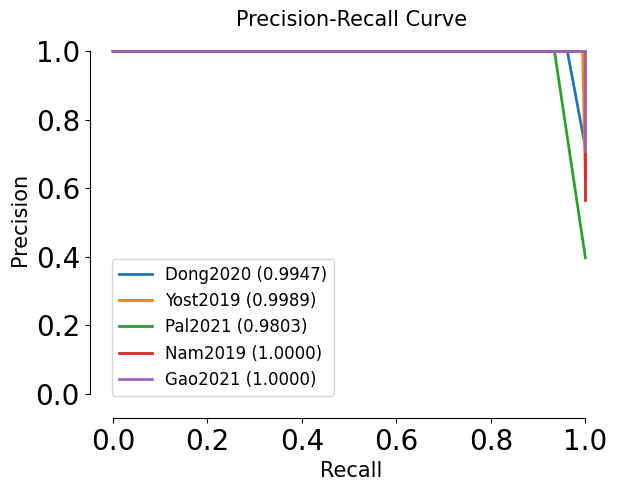

In [127]:
plt.figure()
for i in all_meta['paper'].unique():
    pos = all_meta[all_meta['paper'] == i]
    precision, recall, _ = precision_recall_curve(pos['orig'], pos['pred'])
    print(i, precision, recall)
    plt.plot(recall, precision, lw=2, label=f'{i} ({auc(recall, precision):.4f})')

plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.title('Precision-Recall Curve', fontsize=15)
plt.xlim([-0.02, 1.03])
plt.ylim([-0.03, 1.05])
sns.despine(right=True, top=True, offset=10, trim=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="lower left", prop={'size': 12})
# plt.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), prop={'size': 12}, borderaxespad=0.)
plt.savefig('hallmark_val_pr.png', dpi=1200, bbox_inches='tight')
plt.show()

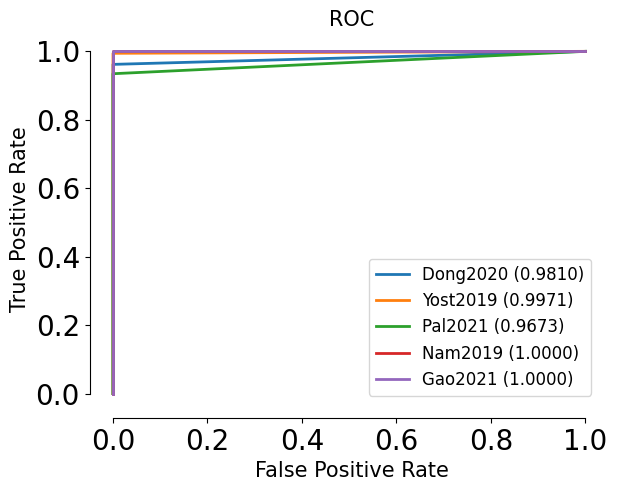

In [128]:
plt.figure()
for i in all_meta['paper'].unique():
    pos = all_meta[all_meta['paper'] == i]
    fpr, tpr, _ = roc_curve(pos['orig'], pos['pred'])
    plt.plot(fpr, tpr, lw=2, label=f'{i} ({1 - auc(tpr, fpr):.4f})')

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC', fontsize=15)
plt.xlim([-0.02, 1.03])
plt.ylim([-0.03, 1.05])
sns.despine(right=True, top=True, offset=10, trim=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="lower right", prop={'size': 12})
# plt.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), prop={'size': 12}, borderaxespad=0.)
plt.savefig('hallmark_val_roc.png', dpi=1200, bbox_inches='tight')
plt.show()